In [1]:
import os
DIRECTORY_PATH = '/'
os.chdir(DIRECTORY_PATH)

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from metrics.metrics import Metrics
from rankers.cat_boost_classifier_ranker.config import CONFIG as CONFIG_cat_boost_classifier_ranker
from rankers.knn_item_based_ranker.config import CONFIG as CONFIG_knn_item_based_ranker
from rankers.popularity_ranker.config import CONFIG as CONFIG_popularity_ranker
from matplotlib.ticker import FuncFormatter

In [37]:
# Define the formatter function to convert y-axis values to percentages
def to_percent(y, position):
    return f'{y * 100:.0f}%'

In [3]:
sns.set()

In [4]:
true_positives_cat_boost_classifier_ranker = pd.read_pickle(CONFIG_cat_boost_classifier_ranker["df_true_positives_test_path"])
recommendations_cat_boost_classifier_ranker = pd.read_pickle(CONFIG_cat_boost_classifier_ranker["df_recommendations_test_path"])
metrics_cat_boost_classifier_ranker = Metrics.evaluate(
    recommendations_cat_boost_classifier_ranker, 
    true_positives_cat_boost_classifier_ranker, 
    k=5
)

In [5]:
true_positives_knn_item_based_ranker = pd.read_pickle(CONFIG_knn_item_based_ranker["df_true_positives_test_path"])
recommendations_knn_item_based_ranker = pd.read_pickle(CONFIG_knn_item_based_ranker["df_recommendations_user_test_path"])
metrics_knn_item_based_ranker = Metrics.evaluate(
    true_positives_knn_item_based_ranker, 
    recommendations_knn_item_based_ranker, 
    k=5
)

In [6]:
true_positives_popularity_ranker = pd.read_pickle(CONFIG_popularity_ranker["df_true_positives_test_path"])
recommendations_popularity_ranker = pd.read_pickle(CONFIG_popularity_ranker["df_recommendations_test_path"])
metrics_popularity_ranker = Metrics.evaluate(
    true_positives_popularity_ranker, 
    recommendations_popularity_ranker, 
    k=5
)

In [48]:
df_compare_metrics = pd.DataFrame({
    'knn_item_based': metrics_knn_item_based_ranker,
    'cat_boost_classifier': metrics_cat_boost_classifier_ranker,
    'popularity': metrics_popularity_ranker,
}).T[['precision@5', 'personalization@5']]

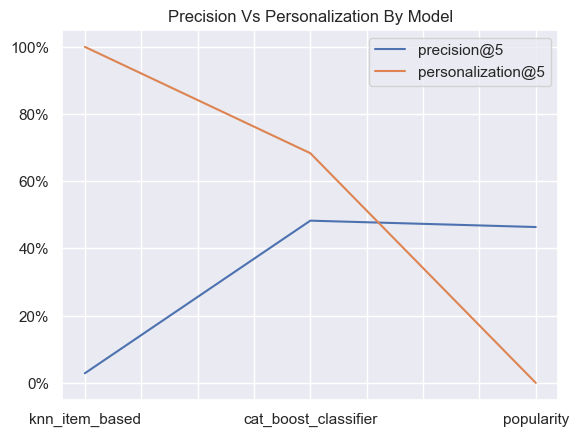

In [49]:
_ = df_compare_metrics.plot()
_ = plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
_ = plt.title('Precision Vs Personalization By Model')
